In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import time
from itertools import combinations, groupby

This block of code generate random graph with certain number of nodes 
If you call this function with (.edges(data = True)) function return graph and list with vertex that conected and weight of conection 

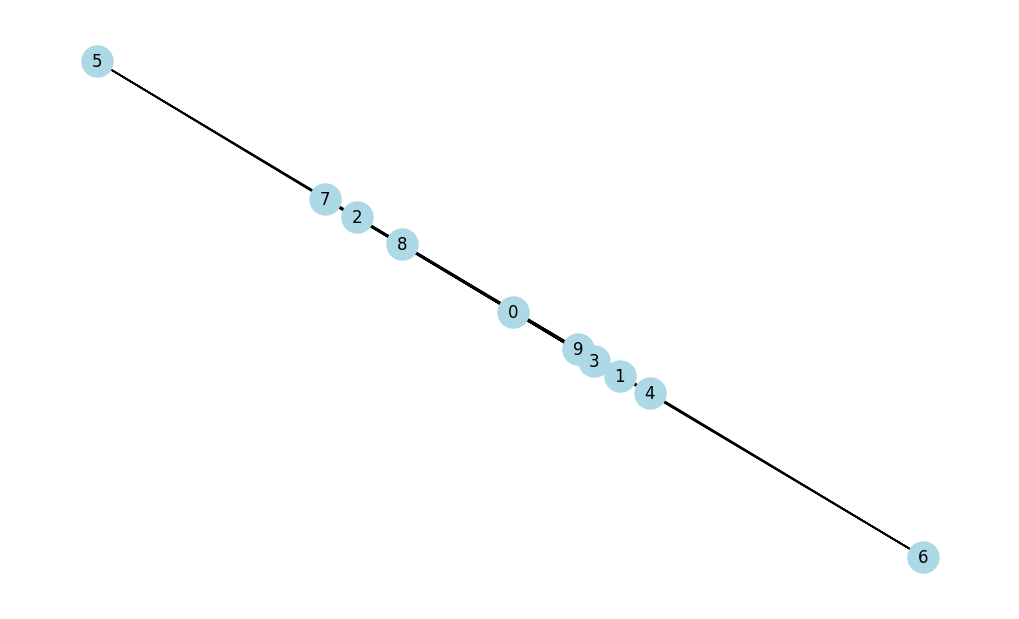

In [9]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
    return G
graph_data = gnp_random_connected_graph(10, 1, False, True).edges(data = True)


This block prepare data from previous function for algorithm in the net function

In [11]:
def graph_preparation(graph: list) -> list:
    """
    Function change and sort record of graph from previous function
    """
    true_graph = []
    for i in graph:
        elem = [i[2]["weight"], i[0], i[1]]
        true_graph.append(tuple(elem))
    true_graph.sort(key=lambda a: a[0])
    return true_graph

This block of code make kruskals algorithm 
Find carcass of minimal weight 

In [12]:
def kruskal_algorithm(true_graph: list) -> list:
    conected_vertexes = set()
    isolated_vertexes = {}
    edge = []

    for ed in true_graph:
        if ed[1] not in conected_vertexes or ed[2] not in conected_vertexes:
            if ed[1] not in conected_vertexes and ed[2] not in conected_vertexes:
                isolated_vertexes[ed[1]] = [ed[1], ed[2]]
                isolated_vertexes[ed[2]] = isolated_vertexes[ed[1]]
            else:
                if not isolated_vertexes.get(ed[1]):
                    isolated_vertexes[ed[2]].append(ed[1])
                    isolated_vertexes[ed[1]] = isolated_vertexes[ed[2]]
                else:
                    isolated_vertexes[ed[1]].append(ed[2])
                    isolated_vertexes[ed[2]] = isolated_vertexes[ed[1]]

            edge.append(ed)
            conected_vertexes.add(ed[1])
            conected_vertexes.add(ed[2])

    for ed in true_graph:
        if ed[2] not in isolated_vertexes[ed[1]]:
            edge.append(ed)
            gr1 = isolated_vertexes[ed[1]]
            isolated_vertexes[ed[1]] += isolated_vertexes[ed[2]]
            isolated_vertexes[ed[2]] += gr1
    return edge
print(kruskal_algorithm(graph_preparation(graph_data)))

[(-5, 1, 5), (-4, 2, 6), (-4, 6, 7), (-4, 7, 9), (-3, 3, 5), (-2, 0, 5), (-2, 6, 8), (0, 4, 5), (-4, 5, 6)]


This block of code return time of the work for algorithm with defferent number of vertex

In [5]:
def time_compare():
    """
    function
    """
    num_vert = [10, 20, 50, 100, 200]
    for num in num_vert:
        graph_data = gnp_random_connected_graph(num, 1, False, False).edges(data = True)
        start_time = time.time()
        kruskal_algorithm(graph_preparation(graph_data))
        print(f"{num}vertex -- %s sec " % (time.time() - start_time))
    return "my algo_result |"
print(time_compare())    

10vertex -- 7.605552673339844e-05 sec 
20vertex -- 0.0006020069122314453 sec 
50vertex -- 0.0029370784759521484 sec 
100vertex -- 0.10414910316467285 sec 
200vertex -- 12.753339052200317 sec 
my algo_result |
